In [1]:
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
random_state = 233

In [4]:
import math
def rmsle(y, y_pred):
    assert len(y) == len(y_pred)
    terms_to_sum = [(math.log(y_pred[i] + 1) - math.log(y[i] + 1)) ** 2.0 for i,pred in enumerate(y_pred)]
    return (sum(terms_to_sum) * (1.0/len(y))) ** 0.5

In [5]:
df_air_visit_data = pd.read_csv("data/air_visit_data.csv")
df_air_store_info = pd.read_csv("data/air_store_info.csv")
df_date_info = pd.read_csv("data/date_info.csv")
df_hpg_store_info = pd.read_csv("data/hpg_store_info.csv")
df_air_reserve = pd.read_csv("data/air_reserve.csv")
df_hpg_reserve = pd.read_csv("data/hpg_reserve.csv")
df_store_id_relation = pd.read_csv("data/store_id_relation.csv")
df_sample_submission = pd.read_csv("data/sample_submission.csv")

In [6]:
df_date_info.rename(columns={'calendar_date':'visit_date'}, inplace=True)

In [7]:
df_air_reserve['visit_datetime'] = pd.to_datetime(df_air_reserve['visit_datetime'])
df_air_reserve['visit_datetime'] = df_air_reserve['visit_datetime'].dt.date
df_air_reserve['reserve_datetime'] = pd.to_datetime(df_air_reserve['reserve_datetime'])
df_air_reserve['reserve_datetime'] = df_air_reserve['reserve_datetime'].dt.date
df_air_reserve['reserve_datetime_diff'] = df_air_reserve.apply(lambda r: (r['visit_datetime'] - r['reserve_datetime']).days, axis=1)

df_air_reserve_grouped = df_air_reserve.groupby(['air_store_id','visit_datetime'], as_index=False)[['reserve_datetime_diff', 'reserve_visitors']].sum().rename(columns={'reserve_datetime_diff':'reserve_datetime_diff_sum','reserve_visitors':'reserve_visitors_sum'})
df_air_reserve_grouped['reserve_datetime_diff_mean'] = df_air_reserve.groupby(['air_store_id','visit_datetime'])['reserve_datetime_diff'].mean().values
df_air_reserve_grouped['reserve_visitors_mean'] = df_air_reserve.groupby(['air_store_id','visit_datetime'])['reserve_visitors'].mean().values
df_air_reserve_grouped = df_air_reserve_grouped.rename(columns={'visit_datetime':'visit_date'})
df_air_reserve_grouped.head()

,air_store_id,visit_date,reserve_datetime_diff_sum,reserve_visitors_sum,reserve_datetime_diff_mean,reserve_visitors_mean
0,air_00a91d42b08b08d9,2016-10-31,0,2,0.0,2.0
1,air_00a91d42b08b08d9,2016-12-05,4,9,4.0,9.0
2,air_00a91d42b08b08d9,2016-12-14,6,18,6.0,18.0
3,air_00a91d42b08b08d9,2016-12-17,6,2,6.0,2.0
4,air_00a91d42b08b08d9,2016-12-20,2,4,2.0,4.0


In [8]:
df_hpg_reserve = pd.merge(df_hpg_reserve, df_store_id_relation, how='inner', on=['hpg_store_id'])

In [9]:
df_hpg_reserve['visit_datetime'] = pd.to_datetime(df_hpg_reserve['visit_datetime'])
df_hpg_reserve['visit_datetime'] = df_hpg_reserve['visit_datetime'].dt.date
df_hpg_reserve['reserve_datetime'] = pd.to_datetime(df_hpg_reserve['reserve_datetime'])
df_hpg_reserve['reserve_datetime'] = df_hpg_reserve['reserve_datetime'].dt.date
df_hpg_reserve['reserve_datetime_diff'] = df_hpg_reserve.apply(lambda r: (r['visit_datetime'] - r['reserve_datetime']).days, axis=1)

df_hpg_reserve_grouped = df_hpg_reserve.groupby(['air_store_id','visit_datetime'], as_index=False)[['reserve_datetime_diff', 'reserve_visitors']].sum().rename(columns={'reserve_datetime_diff':'reserve_datetime_diff_sum','reserve_visitors':'reserve_visitors_sum'})
df_hpg_reserve_grouped['reserve_datetime_diff_mean'] = df_hpg_reserve.groupby(['air_store_id','visit_datetime'])['reserve_datetime_diff'].mean().values
df_hpg_reserve_grouped['reserve_visitors_mean'] = df_hpg_reserve.groupby(['air_store_id','visit_datetime'])['reserve_visitors'].mean().values
df_hpg_reserve_grouped = df_hpg_reserve_grouped.rename(columns={'visit_datetime':'visit_date'})
df_hpg_reserve_grouped.head()

,air_store_id,visit_date,reserve_datetime_diff_sum,reserve_visitors_sum,reserve_datetime_diff_mean,reserve_visitors_mean
0,air_00a91d42b08b08d9,2016-01-14,3,2,3.0,2.0
1,air_00a91d42b08b08d9,2016-01-15,6,4,6.0,4.0
2,air_00a91d42b08b08d9,2016-01-16,3,2,3.0,2.0
3,air_00a91d42b08b08d9,2016-01-22,3,2,3.0,2.0
4,air_00a91d42b08b08d9,2016-01-29,6,5,6.0,5.0


In [10]:
df_air_visit_data['visit_date'] = pd.to_datetime(df_air_visit_data['visit_date'])
df_air_visit_data['dow'] = df_air_visit_data['visit_date'].dt.dayofweek
df_air_visit_data['year'] = df_air_visit_data['visit_date'].dt.year
df_air_visit_data['month'] = df_air_visit_data['visit_date'].dt.month
df_air_visit_data['visit_date'] = df_air_visit_data['visit_date'].dt.date
df_air_visit_data.head()

,air_store_id,visit_date,visitors,dow,year,month
0,air_ba937bf13d40fb24,2016-01-13,25,2,2016,1
1,air_ba937bf13d40fb24,2016-01-14,32,3,2016,1
2,air_ba937bf13d40fb24,2016-01-15,29,4,2016,1
3,air_ba937bf13d40fb24,2016-01-16,22,5,2016,1
4,air_ba937bf13d40fb24,2016-01-18,6,0,2016,1


In [11]:
df_sample_submission['visit_date'] = df_sample_submission['id'].map(lambda x: str(x).split('_')[2])
df_sample_submission['air_store_id'] = df_sample_submission['id'].map(lambda x: '_'.join(x.split('_')[:2]))
df_sample_submission['visit_date'] = pd.to_datetime(df_sample_submission['visit_date'])
df_sample_submission['dow'] = df_sample_submission['visit_date'].dt.dayofweek
df_sample_submission['year'] = df_sample_submission['visit_date'].dt.year
df_sample_submission['month'] = df_sample_submission['visit_date'].dt.month
df_sample_submission['visit_date'] = df_sample_submission['visit_date'].dt.date
df_sample_submission.head()

,id,visitors,visit_date,air_store_id,dow,year,month
0,air_00a91d42b08b08d9_2017-04-23,0,2017-04-23,air_00a91d42b08b08d9,6,2017,4
1,air_00a91d42b08b08d9_2017-04-24,0,2017-04-24,air_00a91d42b08b08d9,0,2017,4
2,air_00a91d42b08b08d9_2017-04-25,0,2017-04-25,air_00a91d42b08b08d9,1,2017,4
3,air_00a91d42b08b08d9_2017-04-26,0,2017-04-26,air_00a91d42b08b08d9,2,2017,4
4,air_00a91d42b08b08d9_2017-04-27,0,2017-04-27,air_00a91d42b08b08d9,3,2017,4


In [12]:
unique_stores = df_sample_submission['air_store_id'].unique()
stores = pd.concat([pd.DataFrame({'air_store_id': unique_stores, 'dow': [i]*len(unique_stores)}) for i in range(7)], axis=0, ignore_index=True).reset_index(drop=True)

In [13]:
tmp = df_air_visit_data.groupby(['air_store_id','dow'], as_index=False)['visitors'].min().rename(columns={'visitors':'min_visitors'})
stores = pd.merge(stores, tmp, how='left', on=['air_store_id','dow']) 
tmp = df_air_visit_data.groupby(['air_store_id','dow'], as_index=False)['visitors'].mean().rename(columns={'visitors':'mean_visitors'})
stores = pd.merge(stores, tmp, how='left', on=['air_store_id','dow'])
tmp = df_air_visit_data.groupby(['air_store_id','dow'], as_index=False)['visitors'].median().rename(columns={'visitors':'median_visitors'})
stores = pd.merge(stores, tmp, how='left', on=['air_store_id','dow'])
tmp = df_air_visit_data.groupby(['air_store_id','dow'], as_index=False)['visitors'].max().rename(columns={'visitors':'max_visitors'})
stores = pd.merge(stores, tmp, how='left', on=['air_store_id','dow'])
tmp = df_air_visit_data.groupby(['air_store_id','dow'], as_index=False)['visitors'].count().rename(columns={'visitors':'count_observations'})
stores = pd.merge(stores, tmp, how='left', on=['air_store_id','dow'])
stores.head()

,air_store_id,dow,min_visitors,mean_visitors,median_visitors,max_visitors,count_observations
0,air_00a91d42b08b08d9,0,1.0,22.457143,19.0,47.0,35.0
1,air_0164b9927d20bcc3,0,2.0,7.500000,6.0,19.0,20.0
2,air_0241aa3964b7f861,0,2.0,8.920635,8.0,23.0,63.0
3,air_0328696196e46f18,0,2.0,6.416667,4.0,27.0,12.0
4,air_034a3d5b40d5b1b1,0,1.0,11.864865,10.0,66.0,37.0


In [14]:
from sklearn import ensemble, neighbors, linear_model, metrics, preprocessing

In [15]:
stores = pd.merge(stores, df_air_store_info, how='left', on=['air_store_id']) 
lbl = preprocessing.LabelEncoder()
stores['air_genre_name'] = lbl.fit_transform(stores['air_genre_name'])
stores = stores.drop(["air_area_name"],axis=1)
# stores['air_area_name'] = lbl.fit_transform(stores['air_area_name'])
stores.head()

,air_store_id,dow,min_visitors,mean_visitors,median_visitors,max_visitors,count_observations,air_genre_name,latitude,longitude
0,air_00a91d42b08b08d9,0,1.0,22.457143,19.0,47.0,35.0,6,35.694003,139.753595
1,air_0164b9927d20bcc3,0,2.0,7.500000,6.0,19.0,20.0,6,35.658068,139.751599
2,air_0241aa3964b7f861,0,2.0,8.920635,8.0,23.0,63.0,7,35.712607,139.779996
3,air_0328696196e46f18,0,2.0,6.416667,4.0,27.0,12.0,4,34.701279,135.528090
4,air_034a3d5b40d5b1b1,0,1.0,11.864865,10.0,66.0,37.0,2,34.692337,135.472229


In [16]:
df_date_info['visit_date'] = pd.to_datetime(df_date_info['visit_date'])
df_date_info['day_of_week'] = lbl.fit_transform(df_date_info['day_of_week'])
df_date_info['visit_date'] = df_date_info['visit_date'].dt.date

In [17]:
 def continue_count(df, column, val):
    df['new_value'] = df[column].fillna('-')
    df['changepoint_cumsum'] = (df['new_value'] != df['new_value'].shift()).cumsum()
    df_group = df.groupby(['new_value', 'changepoint_cumsum'])
    mi_df = df.set_index(['new_value', 'changepoint_cumsum'])
    mi_df['continue_count'] = df_group['new_value'].count()
    df = mi_df.reset_index()
    df.loc[df[column]!=val, 'continue_count'] = 0
    return df.drop(['new_value', 'changepoint_cumsum'], axis=1)

In [18]:
df_date_info = continue_count(df_date_info, "holiday_flg", 1)
df_date_info.head()

,visit_date,day_of_week,holiday_flg,continue_count
0,2016-01-01,0,1,3
1,2016-01-02,2,1,3
2,2016-01-03,3,1,3
3,2016-01-04,1,0,0
4,2016-01-05,5,0,0


In [19]:
train = pd.merge(df_air_visit_data, df_date_info, how='left', on=['visit_date']) 
test = pd.merge(df_sample_submission, df_date_info, how='left', on=['visit_date'])

In [20]:
train = pd.merge(train, stores, how='left', on=['air_store_id','dow']) 
test = pd.merge(test, stores, how='left', on=['air_store_id','dow'])

In [21]:
train = pd.merge(train, df_air_reserve_grouped, how='left', on=['air_store_id','visit_date']) 
test = pd.merge(test, df_air_reserve_grouped, how='left', on=['air_store_id','visit_date'])

In [22]:
train = pd.merge(train, df_hpg_reserve_grouped, how='left', on=['air_store_id','visit_date']) 
test = pd.merge(test, df_hpg_reserve_grouped, how='left', on=['air_store_id','visit_date'])

In [23]:
test.head()

,id,visitors,visit_date,air_store_id,dow,year,month,day_of_week,holiday_flg,continue_count,...,latitude,longitude,reserve_datetime_diff_sum_x,reserve_visitors_sum_x,reserve_datetime_diff_mean_x,reserve_visitors_mean_x,reserve_datetime_diff_sum_y,reserve_visitors_sum_y,reserve_datetime_diff_mean_y,reserve_visitors_mean_y
0,air_00a91d42b08b08d9_2017-04-23,0,2017-04-23,air_00a91d42b08b08d9,6,2017,4,3,0,0,...,35.694003,139.753595,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,air_00a91d42b08b08d9_2017-04-24,0,2017-04-24,air_00a91d42b08b08d9,0,2017,4,1,0,0,...,35.694003,139.753595,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,air_00a91d42b08b08d9_2017-04-25,0,2017-04-25,air_00a91d42b08b08d9,1,2017,4,5,0,0,...,35.694003,139.753595,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,air_00a91d42b08b08d9_2017-04-26,0,2017-04-26,air_00a91d42b08b08d9,2,2017,4,6,0,0,...,35.694003,139.753595,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,air_00a91d42b08b08d9_2017-04-27,0,2017-04-27,air_00a91d42b08b08d9,3,2017,4,4,0,0,...,35.694003,139.753595,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
tmp = train.groupby(['air_store_id','month'], as_index=False)['visitors'].min().rename(columns={'visitors':'min_visitors_m'})
train = pd.merge(train, tmp, how='left', on=['air_store_id','month']) 
test = pd.merge(test, tmp, how='left', on=['air_store_id','month']) 
tmp = train.groupby(['air_store_id','month'], as_index=False)['visitors'].mean().rename(columns={'visitors':'mean_visitors_m'})
train = pd.merge(train, tmp, how='left', on=['air_store_id','month'])
test = pd.merge(test, tmp, how='left', on=['air_store_id','month']) 
tmp = train.groupby(['air_store_id','month'], as_index=False)['visitors'].median().rename(columns={'visitors':'median_visitors_m'})
train = pd.merge(train, tmp, how='left', on=['air_store_id','month'])
test = pd.merge(test, tmp, how='left', on=['air_store_id','month']) 
tmp = train.groupby(['air_store_id','month'], as_index=False)['visitors'].max().rename(columns={'visitors':'max_visitors_m'})
train = pd.merge(train, tmp, how='left', on=['air_store_id','month'])
test = pd.merge(test, tmp, how='left', on=['air_store_id','month']) 
tmp = train.groupby(['air_store_id','month'], as_index=False)['visitors'].count().rename(columns={'visitors':'count_observations_m'})
train = pd.merge(train, tmp, how='left', on=['air_store_id','month'])
test = pd.merge(test, tmp, how='left', on=['air_store_id','month']) 

In [25]:
train.head()

,air_store_id,visit_date,visitors,dow,year,month,day_of_week,holiday_flg,continue_count,min_visitors,...,reserve_visitors_mean_x,reserve_datetime_diff_sum_y,reserve_visitors_sum_y,reserve_datetime_diff_mean_y,reserve_visitors_mean_y,min_visitors_m,mean_visitors_m,median_visitors_m,max_visitors_m,count_observations_m
0,air_ba937bf13d40fb24,2016-01-13,25,2,2016,1,6,0,0,7.0,...,NaN,NaN,NaN,NaN,NaN,1,18.35,21.0,38,40
1,air_ba937bf13d40fb24,2016-01-14,32,3,2016,1,4,0,0,2.0,...,NaN,NaN,NaN,NaN,NaN,1,18.35,21.0,38,40
2,air_ba937bf13d40fb24,2016-01-15,29,4,2016,1,0,0,0,4.0,...,NaN,NaN,NaN,NaN,NaN,1,18.35,21.0,38,40
3,air_ba937bf13d40fb24,2016-01-16,22,5,2016,1,2,0,0,6.0,...,NaN,NaN,NaN,NaN,NaN,1,18.35,21.0,38,40
4,air_ba937bf13d40fb24,2016-01-18,6,0,2016,1,1,0,0,2.0,...,NaN,NaN,NaN,NaN,NaN,1,18.35,21.0,38,40


In [27]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 252108 entries, 0 to 252107
Data columns (total 30 columns):
air_store_id                    252108 non-null object
visit_date                      252108 non-null object
visitors                        252108 non-null int64
dow                             252108 non-null int64
year                            252108 non-null int64
month                           252108 non-null int64
day_of_week                     252108 non-null int64
holiday_flg                     252108 non-null int64
continue_count                  252108 non-null int64
min_visitors                    250468 non-null float64
mean_visitors                   250468 non-null float64
median_visitors                 250468 non-null float64
max_visitors                    250468 non-null float64
count_observations              250468 non-null float64
air_genre_name                  250468 non-null float64
latitude                        250468 non-null float64
longitude

In [28]:
train = train.sort_values(by=["air_store_id", "visit_date"], ascending=True)

In [29]:
train["diff_visitors_1"] = pd.Series(np.insert(train["max_visitors"].values[1:]-train["min_visitors"].values[:-1], 0, 0, axis=0))
train["diff_visitors_2"] = pd.Series(np.insert(train["max_visitors"].values[2:]-train["min_visitors"].values[:-2], 0, [0]*2, axis=0))
train["diff_visitors_3"] = pd.Series(np.insert(train["max_visitors"].values[3:]-train["min_visitors"].values[:-3], 0, [0]*3, axis=0))
train["diff_visitors_4"] = pd.Series(np.insert(train["max_visitors"].values[4:]-train["min_visitors"].values[:-4], 0, [0]*4, axis=0))
train["diff_visitors_5"] = pd.Series(np.insert(train["max_visitors"].values[5:]-train["min_visitors"].values[:-5], 0, [0]*5, axis=0))
train["diff_visitors_6"] = pd.Series(np.insert(train["max_visitors"].values[6:]-train["min_visitors"].values[:-6], 0, [0]*6, axis=0))
train["diff_visitors_7"] = pd.Series(np.insert(train["max_visitors"].values[7:]-train["min_visitors"].values[:-7], 0, [0]*7, axis=0))

train["diff_visitors_1_re"] = pd.Series(np.insert(train["min_visitors"].values[1:]-train["max_visitors"].values[:-1], 0, 0, axis=0))
train["diff_visitors_2_re"] = pd.Series(np.insert(train["min_visitors"].values[2:]-train["max_visitors"].values[:-2], 0, [0]*2, axis=0))
train["diff_visitors_3_re"] = pd.Series(np.insert(train["min_visitors"].values[3:]-train["max_visitors"].values[:-3], 0, [0]*3, axis=0))
train["diff_visitors_4_re"] = pd.Series(np.insert(train["min_visitors"].values[4:]-train["max_visitors"].values[:-4], 0, [0]*4, axis=0))
train["diff_visitors_5_re"] = pd.Series(np.insert(train["min_visitors"].values[5:]-train["max_visitors"].values[:-5], 0, [0]*5, axis=0))
train["diff_visitors_6_re"] = pd.Series(np.insert(train["min_visitors"].values[6:]-train["max_visitors"].values[:-6], 0, [0]*6, axis=0))
train["diff_visitors_7_re"] = pd.Series(np.insert(train["min_visitors"].values[7:]-train["max_visitors"].values[:-7], 0, [0]*7, axis=0))


test["diff_visitors_1"] = pd.Series(np.insert(test["max_visitors"].values[1:]-test["min_visitors"].values[:-1], 0, 0, axis=0))
test["diff_visitors_2"] = pd.Series(np.insert(test["max_visitors"].values[2:]-test["min_visitors"].values[:-2], 0, [0]*2, axis=0))
test["diff_visitors_3"] = pd.Series(np.insert(test["max_visitors"].values[3:]-test["min_visitors"].values[:-3], 0, [0]*3, axis=0))
test["diff_visitors_4"] = pd.Series(np.insert(test["max_visitors"].values[4:]-test["min_visitors"].values[:-4], 0, [0]*3, axis=0))
test["diff_visitors_5"] = pd.Series(np.insert(test["max_visitors"].values[5:]-test["min_visitors"].values[:-5], 0, [0]*3, axis=0))
test["diff_visitors_6"] = pd.Series(np.insert(test["max_visitors"].values[6:]-test["min_visitors"].values[:-6], 0, [0]*3, axis=0))
test["diff_visitors_7"] = pd.Series(np.insert(test["max_visitors"].values[7:]-test["min_visitors"].values[:-7], 0, [0]*3, axis=0))

test["diff_visitors_1_re"] = pd.Series(np.insert(test["min_visitors"].values[1:]-test["max_visitors"].values[:-1], 0, 0, axis=0))
test["diff_visitors_2_re"] = pd.Series(np.insert(test["min_visitors"].values[2:]-test["max_visitors"].values[:-2], 0, [0]*2, axis=0))
test["diff_visitors_3_re"] = pd.Series(np.insert(test["min_visitors"].values[3:]-test["max_visitors"].values[:-3], 0, [0]*3, axis=0))
test["diff_visitors_4_re"] = pd.Series(np.insert(test["min_visitors"].values[4:]-test["max_visitors"].values[:-4], 0, [0]*3, axis=0))
test["diff_visitors_5_re"] = pd.Series(np.insert(test["min_visitors"].values[5:]-test["max_visitors"].values[:-5], 0, [0]*3, axis=0))
test["diff_visitors_6_re"] = pd.Series(np.insert(test["min_visitors"].values[6:]-test["max_visitors"].values[:-6], 0, [0]*3, axis=0))
test["diff_visitors_7_re"] = pd.Series(np.insert(test["min_visitors"].values[7:]-test["max_visitors"].values[:-7], 0, [0]*3, axis=0))

In [30]:
pd.get_dummies(train, columns=['day_of_week'])

,air_store_id,visit_date,visitors,dow,year,month,holiday_flg,continue_count,min_visitors,mean_visitors,...,diff_visitors_5_re,diff_visitors_6_re,diff_visitors_7_re,day_of_week_0,day_of_week_1,day_of_week_2,day_of_week_3,day_of_week_4,day_of_week_5,day_of_week_6
87534,air_00a91d42b08b08d9,2016-07-01,35,4,2016,7,0,0,17.0,36.500000,...,-52.0,-55.0,-50.0,1,0,0,0,0,0,0
87535,air_00a91d42b08b08d9,2016-07-02,9,5,2016,7,0,0,3.0,14.973684,...,-77.0,-59.0,-62.0,0,0,1,0,0,0,0
87536,air_00a91d42b08b08d9,2016-07-04,20,0,2016,7,0,0,1.0,22.457143,...,-178.0,-75.0,-57.0,0,1,0,0,0,0,0
87537,air_00a91d42b08b08d9,2016-07-05,25,1,2016,7,0,0,1.0,24.350000,...,-51.0,-174.0,-71.0,0,0,0,0,0,1,0
87538,air_00a91d42b08b08d9,2016-07-06,29,2,2016,7,0,0,15.0,28.125000,...,-55.0,-50.0,-173.0,0,0,0,0,0,0,1
87539,air_00a91d42b08b08d9,2016-07-07,34,3,2016,7,0,0,15.0,29.868421,...,-59.0,-62.0,-57.0,0,0,0,0,1,0,0
87540,air_00a91d42b08b08d9,2016-07-08,42,4,2016,7,0,0,17.0,36.500000,...,-12.0,-52.0,-55.0,1,0,0,0,0,0,0
87541,air_00a91d42b08b08d9,2016-07-09,11,5,2016,7,0,0,3.0,14.973684,...,-71.0,-13.0,-53.0,0,0,1,0,0,0,0
87542,air_00a91d42b08b08d9,2016-07-11,25,0,2016,7,0,0,1.0,22.457143,...,-173.0,-70.0,-12.0,0,1,0,0,0,0,0
87543,air_00a91d42b08b08d9,2016-07-12,24,1,2016,7,0,0,1.0,24.350000,...,-57.0,-180.0,-77.0,0,0,0,0,0,1,0


In [31]:
train['date_int'] = train['visit_date'].apply(lambda x: x.strftime('%Y%m%d')).astype(int)
test['date_int'] = test['visit_date'].apply(lambda x: x.strftime('%Y%m%d')).astype(int)
train['var_max_lat'] = train['latitude'].max() - train['latitude']
train['var_max_long'] = train['longitude'].max() - train['longitude']
test['var_max_lat'] = test['latitude'].max() - test['latitude']
test['var_max_long'] = test['longitude'].max() - test['longitude']

train['lon_plus_lat'] = train['longitude'] + train['latitude'] 
test['lon_plus_lat'] = test['longitude'] + test['latitude']

In [32]:
col = [c for c in train if c not in ['id', 'air_store_id','visit_date','visitors', "dow"]]
train = train.fillna(-1)
test = test.fillna(-1)

In [33]:
train.head()

,air_store_id,visit_date,visitors,dow,year,month,day_of_week,holiday_flg,continue_count,min_visitors,...,diff_visitors_2_re,diff_visitors_3_re,diff_visitors_4_re,diff_visitors_5_re,diff_visitors_6_re,diff_visitors_7_re,date_int,var_max_lat,var_max_long,lon_plus_lat
87534,air_00a91d42b08b08d9,2016-07-01,35,4,2016,7,0,0,0,17.0,...,-50.0,-173.0,-70.0,-52.0,-55.0,-50.0,20160701,8.326629,4.519803,175.447598
87535,air_00a91d42b08b08d9,2016-07-02,9,5,2016,7,2,0,0,3.0,...,-62.0,-57.0,-180.0,-77.0,-59.0,-62.0,20160702,8.326629,4.519803,175.447598
87536,air_00a91d42b08b08d9,2016-07-04,20,0,2016,7,1,0,0,1.0,...,-57.0,-60.0,-55.0,-178.0,-75.0,-57.0,20160704,8.326629,4.519803,175.447598
87537,air_00a91d42b08b08d9,2016-07-05,25,1,2016,7,5,0,0,1.0,...,-13.0,-53.0,-56.0,-51.0,-174.0,-71.0,20160705,8.326629,4.519803,175.447598
87538,air_00a91d42b08b08d9,2016-07-06,29,2,2016,7,6,0,0,15.0,...,-70.0,-12.0,-52.0,-55.0,-50.0,-173.0,20160706,8.326629,4.519803,175.447598


In [34]:
train[col].columns

Index(['year', 'month', 'day_of_week', 'holiday_flg', 'continue_count',
       'min_visitors', 'mean_visitors', 'median_visitors', 'max_visitors',
       'count_observations', 'air_genre_name', 'latitude', 'longitude',
       'reserve_datetime_diff_sum_x', 'reserve_visitors_sum_x',
       'reserve_datetime_diff_mean_x', 'reserve_visitors_mean_x',
       'reserve_datetime_diff_sum_y', 'reserve_visitors_sum_y',
       'reserve_datetime_diff_mean_y', 'reserve_visitors_mean_y',
       'min_visitors_m', 'mean_visitors_m', 'median_visitors_m',
       'max_visitors_m', 'count_observations_m', 'diff_visitors_1',
       'diff_visitors_2', 'diff_visitors_3', 'diff_visitors_4',
       'diff_visitors_5', 'diff_visitors_6', 'diff_visitors_7',
       'diff_visitors_1_re', 'diff_visitors_2_re', 'diff_visitors_3_re',
       'diff_visitors_4_re', 'diff_visitors_5_re', 'diff_visitors_6_re',
       'diff_visitors_7_re', 'date_int', 'var_max_lat', 'var_max_long',
       'lon_plus_lat'],
      dtype='objec

In [35]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train[col].values, np.log1p(train["visitors"].values), test_size=0.2, random_state=random_state)

In [36]:
from sklearn.model_selection import GridSearchCV

"""knn = neighbors.KNeighborsRegressor()

model_cv = GridSearchCV(knn, {'n_neighbors':[3,4,5,6],'weights':['uniform','distance']}, verbose=1)
model_cv.fit(X_train, y_train)
print(model_cv.best_params_)"""

params = {'n_neighbors': 10, 'weights': 'distance'}

knn = neighbors.KNeighborsRegressor(**params)

knn.fit(X_train, y_train)
rmsle(np.expm1(y_test), np.expm1(knn.predict(X_test)))

0.5544609465882446

In [46]:
test['visitors'] = knn.predict(test[col])
test['visitors'] = np.expm1(test['visitors']).clip(lower=0.)
test[['id','visitors']].to_csv('submission_knn.csv', index=False)

In [47]:
"""etc = ensemble.ExtraTreesRegressor(random_state=random_state, n_jobs=-1)

model_cv = GridSearchCV(etc, {'max_depth':[4,5,6]}, verbose=1)
model_cv.fit(X_train, y_train)
print(model_cv.best_params_)"""

params = {'max_depth': 10, 'random_state':random_state, 'n_jobs':-1}

etc = ensemble.ExtraTreesRegressor(**params)
etc.fit(X_train, y_train)
rmsle(np.expm1(y_test), np.expm1(etc.predict(X_test)))

0.49225928395774404

In [48]:
test['visitors'] = etc.predict(test[col])
test['visitors'] = np.expm1(test['visitors']).clip(lower=0.)
test[['id','visitors']].to_csv('submission_etc.csv', index=False)

In [37]:
"""gbr = ensemble.GradientBoostingRegressor(random_state=random_state)

model_cv = GridSearchCV(gbr, {'subsample':[0.2,0.5,0.8],'max_depth':[4,5,6]}, verbose=1)
model_cv.fit(X_train, y_train)
print(model_cv.best_params_)"""

params = {'max_depth': 6, 'subsample': 0.8, 'random_state':random_state}

gbr = ensemble.GradientBoostingRegressor(**params)
gbr.fit(X_train, y_train)
rmsle(np.expm1(y_test), np.expm1(gbr.predict(X_test)))

0.4821827830945074

In [50]:
test['visitors'] = gbr.predict(test[col])
test['visitors'] = np.expm1(test['visitors']).clip(lower=0.)
test[['id','visitors']].to_csv('submission_gbr.csv', index=False)

In [51]:
"""rfr = ensemble.RandomForestRegressor(random_state=random_state, n_jobs=-1)

model_cv = GridSearchCV(rfr, {'max_depth':[4,5,6]}, verbose=1)
model_cv.fit(X_train, y_train)
print(model_cv.best_params_)"""

params = {'max_depth': 10, 'random_state':random_state}

rfr = ensemble.RandomForestRegressor(**params)
rfr.fit(X_train, y_train)
rmsle(np.expm1(y_test), np.expm1(rfr.predict(X_test)))

0.4863428613545649

In [52]:
test['visitors'] = gbr.predict(test[col])
test['visitors'] = np.expm1(test['visitors']).clip(lower=0.)
test[['id','visitors']].to_csv('submission_rfr.csv', index=False)

In [53]:
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV

lgb_train = lgb.Dataset(X_train, y_train)
lgb_eval = lgb.Dataset(X_test, y_test, reference=lgb_train)

model = lgb.LGBMRegressor(learning_rate=0.05)
"""
model_cv = GridSearchCV(model, {'min_child_weight':[0.001,0.01,0.0001],'subsample_freq':[1,3,5],'reg_alpha':[0.0,0.1,0.3],'reg_lambda':[0.0,0.1,0.3]}, verbose=1)
model_cv.fit(X_train, y_train)
print(model_cv.best_params_)"""

params = {'min_child_weight': 0.001, 'reg_alpha': 0.0, 'reg_lambda': 0.0, 'subsample_freq': 1}

model = lgb.LGBMRegressor(**params)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
np.expm1(y_test), np.expm1(y_pred)
rmsle(np.expm1(y_test), np.expm1(y_pred))

0.549673089626022

In [54]:
test['visitors'] = model.predict(test[col])
test['visitors'] = np.expm1(test['visitors']).clip(lower=0.)
test[['id','visitors']].to_csv('submission_lightxgb_3.csv', index=False)

In [55]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

model = xgb.XGBRegressor(learning_rate=0.05,max_depth=2)

"""model_cv = GridSearchCV(model, {'gamma':[0.2,0.5,0.8],'subsample':[0.2,0.5,0.8],'colsample_bytree':[0.2,0.5,0.8]}, verbose=1)
model_cv.fit(X_train, y_train)

print(model_cv.best_params_)"""
params = {'colsample_bytree': 0.8, 'gamma': 0.2, 'subsample': 0.2}

model = xgb.XGBRegressor(**params)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
rmsle(np.expm1(y_test), np.expm1(y_pred))

0.49247017696121564

In [56]:
test['visitors'] = model.predict(test[col].values)
test['visitors'] = np.expm1(test['visitors']).clip(lower=0.)
test[['id','visitors']].to_csv('submission_xgb_13.csv', index=False)

In [57]:
def rmsle_xgb(preds, dtrain):
    labels = dtrain.get_label()
    score = rmsle(np.expm1(labels), np.expm1(preds))
    return 'rmsle', score

In [58]:
X = train[col].values
y = np.log1p(train["visitors"].values)

params = {
    'colsample_bytree': 0.8,
    'gamma': 0.2,
    'subsample': 0.2,
    'eta': 0.05
    }

from sklearn.model_selection import StratifiedKFold

folds = 5
skf = StratifiedKFold(n_splits=folds, random_state=random_state)

In [59]:
import xgboost as xgb
for train_index, test_index in skf.split(X, y):
    X_train, X_valid = X[train_index],X[test_index]
    y_train, y_valid = y[train_index],y[test_index]
    
    d_train = xgb.DMatrix(X_train, y_train)
    d_valid = xgb.DMatrix(X_valid, y_valid)
    d_test = xgb.DMatrix(test[col].values)
    watchlist = [(d_train, 'train'), (d_valid, 'valid')]
    
    mdl = xgb.train(params, d_train, 1600, watchlist, early_stopping_rounds=100, feval=rmsle_xgb, verbose_eval=100)
    p_test = mdl.predict(d_test, ntree_limit=mdl.best_ntree_limit)
    test['visitors'] += np.expm1(p_test)
        
test['visitors'] /= folds

[0]	train-rmsle:2.32322	valid-rmsle:2.32968
Multiple eval metrics have been passed: 'valid-rmsle' will be used for early stopping.

Will train until valid-rmsle hasn't improved in 100 rounds.
[100]	train-rmsle:0.482384	valid-rmsle:0.503912
[200]	train-rmsle:0.476055	valid-rmsle:0.501927


KeyboardInterrupt: 

In [ ]:
test[['id','visitors']].to_csv('submission_foldxgb.csv', index=False)

In [ ]:
groupdata = df_air_visit_data.groupby(['visit_date'], as_index=False).mean()
f, ax = plt.subplots(figsize=(18, 12))
groupdata.plot(x="visit_date", y="visitors", ax=ax)

In [35]:
from sklearn.ensemble import RandomForestRegressor

random_forest = RandomForestRegressor(n_estimators=100, random_state=random_state)
random_forest.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=1, oob_score=False, random_state=233,
           verbose=0, warm_start=False)

([<matplotlib.axis.YTick at 0x155e6dcc908>,
 <a list of 30 Text yticklabel objects>)

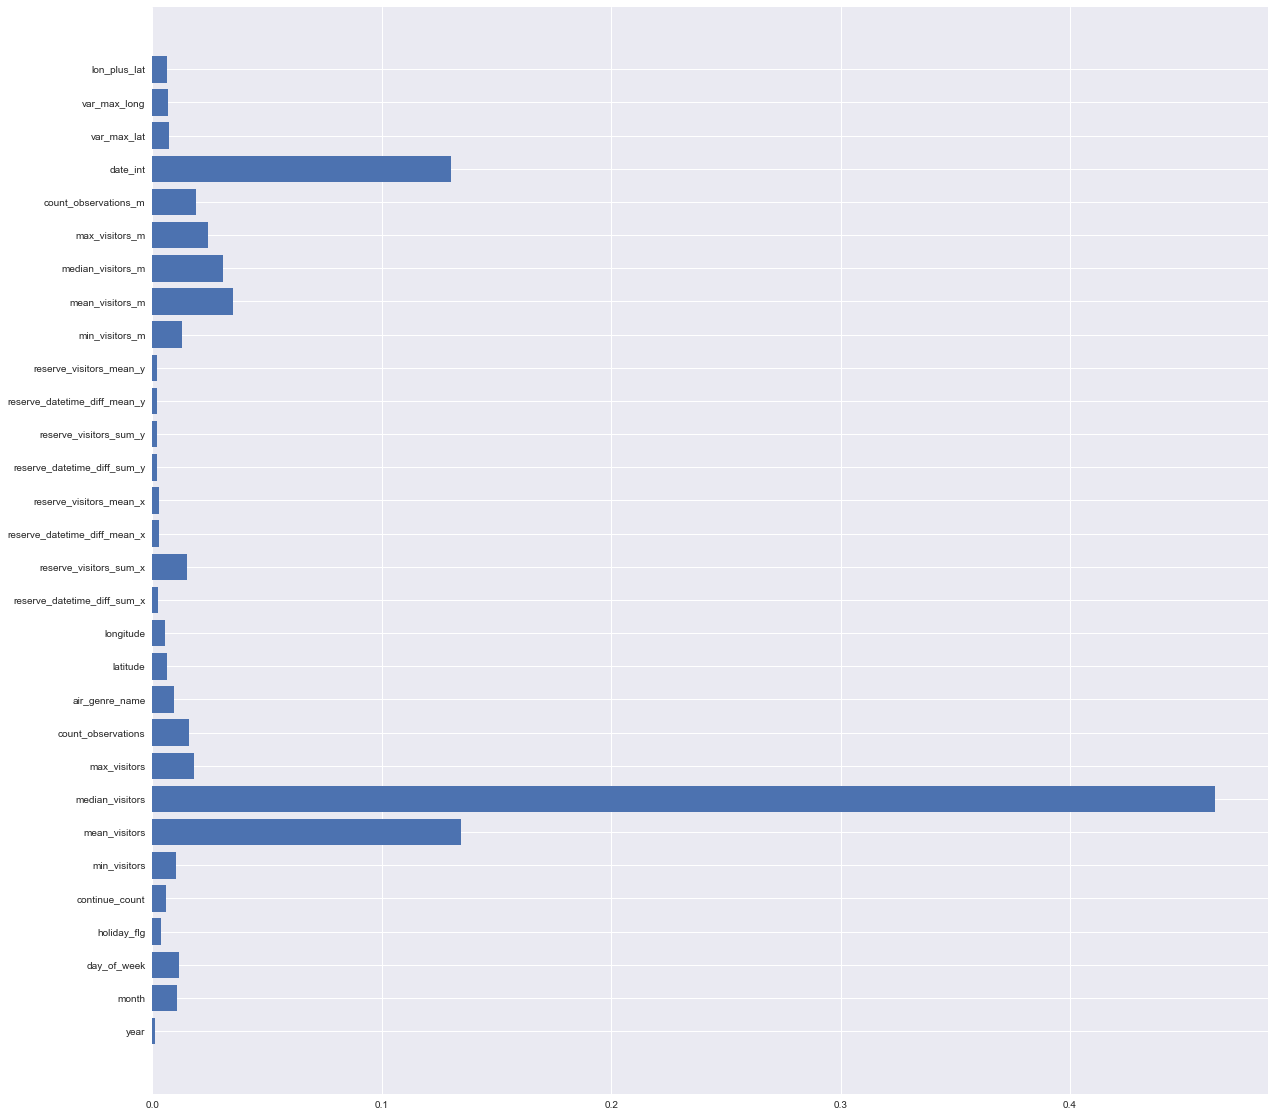

In [36]:
plt.figure(figsize=(20,20))
plt.barh(range(len(train[col].columns)), random_forest.feature_importances_)
plt.yticks(range(len(train[col].columns)), train[col].columns.values)